In [1]:
# =============================
# Step 1: Import Libraries
# =============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# =============================
# Step 2: Load Dataset
# =============================
df = pd.read_csv("news_articles.csv")  # make sure CSV is in same folder
# Ensure the column name is consistent
if 'text' in df.columns:
    df.rename(columns={'text': 'Article'}, inplace=True)

print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (25, 3)
   ArticleID                              Title  \
0          1      Government passes climate law   
1          2  Political leaders clash in debate   
2          3          New tax reforms announced   
3          4          Protests erupt in capital   
4          5      International summit on peace   

                                             Content  
0  The government approved a new climate change l...  
1  During a heated debate, political leaders disc...  
2  The finance minister revealed new tax reforms ...  
3  Thousands of citizens gathered in the capital ...  
4  World leaders met at the international summit ...  


In [3]:
# =============================
# Step 3: TF-IDF Vectorization
# =============================
vectorizer = TfidfVectorizer(stop_words="english",
                             max_df=0.8,   # ignore too common words
                             min_df=2,     # ignore very rare words
                             max_features=1000)  # limit features for speed
X = vectorizer.fit_transform(df["Content"])

print("TF-IDF shape:", X.shape)

TF-IDF shape: (25, 19)


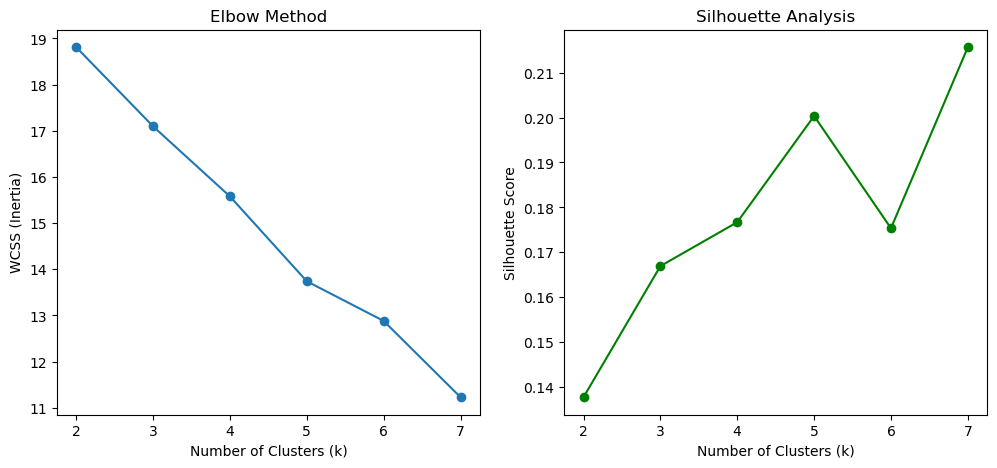

In [4]:
# =============================
# Step 4: Choose K (Elbow & Silhouette)
# =============================
wcss = []
sil_scores = []
K_range = range(2, 8)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
    sil_scores.append(silhouette_score(X, km.labels_))

# Plot results
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, wcss, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method")

plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, marker="o", color="green")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")

plt.show()

In [5]:
# =============================
# Step 5: Train Final KMeans
# =============================
k = 5  # we know our dataset has 5 categories
kmeans = KMeans(n_clusters=k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)


In [6]:
# =============================
# Step 6: Interpret Clusters
# =============================
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

print("\nTop terms per cluster:")
for i in range(k):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i}: {', '.join(top_terms)}")


Top terms per cluster:
Cluster 0: international, match, life, won, national, education, climate, opened, advanced, leaders
Cluster 1: platforms, set, won, revealed, reforms, opened, office, new, national, match
Cluster 2: citizens, city, won, revealed, set, reforms, platforms, new, national, opened
Cluster 3: revealed, reforms, new, set, won, opened, platforms, office, national, match
Cluster 4: new, office, set, global, won, revealed, platforms, opened, national, match



Sample clustered articles:
                               Title  Cluster
0      Government passes climate law        0
1  Political leaders clash in debate        0
2          New tax reforms announced        3
3          Protests erupt in capital        2
4      International summit on peace        0
5    Local football team wins trophy        0
6      Tennis star claims grand slam        0
7       Cricket tournament kicks off        0
8    Basketball player breaks record        4
9     Olympics preparations underway        0


C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_8848\2331314590.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster", data=df, palette="Set2")


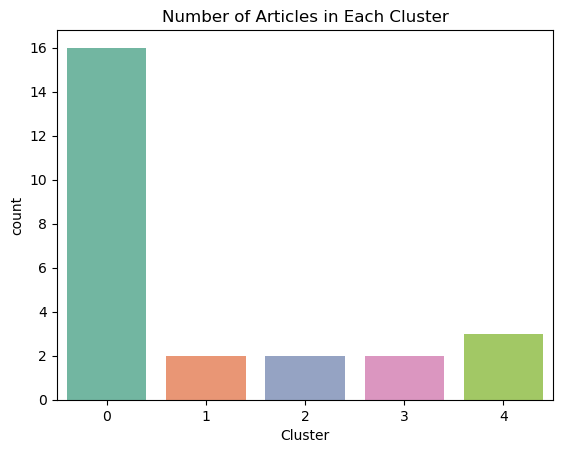

In [7]:
# =============================
# Step 7: Inspect Results
# =============================
print("\nSample clustered articles:")
print(df[["Title", "Cluster"]].head(10))

# Optional: visualize number of articles per cluster
sns.countplot(x="Cluster", data=df, palette="Set2")
plt.title("Number of Articles in Each Cluster")
plt.show()